# ENSAMBLE TECHNIQUES:-

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
claimants_data=pd.read_csv('claimants.csv')
claimants_data.head(40)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


## Data Preparation

In [3]:
del claimants_data['CASENUM']

In [4]:
claimants_data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [5]:
claimants_data.dropna(axis=0, inplace=True)

In [6]:
claimants_data.shape

(1096, 6)

In [7]:
claimants_data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [8]:
claimants_data.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

## Model Building

In [9]:
X=claimants_data.drop(labels='ATTORNEY', axis=1)
y=claimants_data[['ATTORNEY']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=12, shuffle=True)

In [11]:
X_train.shape, y_train.shape

((876, 5), (876, 1))

In [12]:
X_test.shape, y_test.shape

((220, 5), (220, 1))

### Ensamble Technique

In [13]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

### Random Forest

In [14]:
rf_classifier=RandomForestClassifier(max_depth=5)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [15]:
y_train_pred= rf_classifier.predict(X_train)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [17]:
print('Accuracy Score:',accuracy_score(y_train, y_train_pred))

Accuracy Score: 0.7568493150684932


In [18]:
print('Classification Report:\n',classification_report(y_train, y_train_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       464
           1       0.77      0.70      0.73       412

    accuracy                           0.76       876
   macro avg       0.76      0.75      0.75       876
weighted avg       0.76      0.76      0.76       876



In [19]:
print('Confusion Matrix:\n',confusion_matrix(y_train, y_train_pred))

Confusion Matrix:
 [[376  88]
 [125 287]]


0.7534733846668898


Text(0, 0.5, 'True Positive Rate')

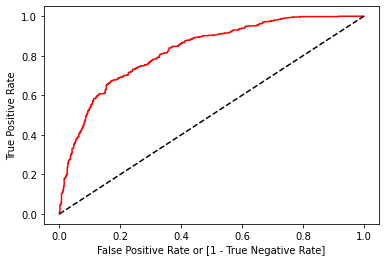

In [20]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, rf_classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_train_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## Test Data

In [21]:
y_pred_test=rf_classifier.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [22]:
print('Accuracy Score:',accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.7045454545454546


In [23]:
print('Classification Report:\n',classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       114
           1       0.69      0.71      0.70       106

    accuracy                           0.70       220
   macro avg       0.70      0.70      0.70       220
weighted avg       0.70      0.70      0.70       220



In [24]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[80 34]
 [31 75]]


0.7046507778881165


Text(0, 0.5, 'True Positive Rate')

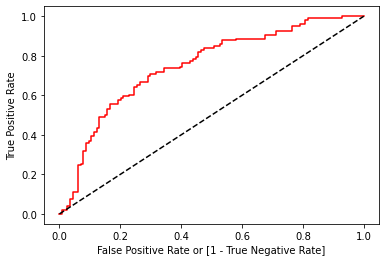

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Gradient Boosting

In [26]:
gb_classifier=GradientBoostingClassifier(max_depth=3)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [27]:
y_train_pred= gb_classifier.predict(X_train)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [29]:
print('Accuracy Score:',accuracy_score(y_train, y_train_pred))

Accuracy Score: 0.8036529680365296


In [30]:
print('Classification Report:\n',classification_report(y_train, y_train_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       464
           1       0.81      0.76      0.78       412

    accuracy                           0.80       876
   macro avg       0.80      0.80      0.80       876
weighted avg       0.80      0.80      0.80       876



In [31]:
print('Confusion Matrix:\n',confusion_matrix(y_train, y_train_pred))

Confusion Matrix:
 [[392  72]
 [100 312]]


0.8010545698024776


Text(0, 0.5, 'True Positive Rate')

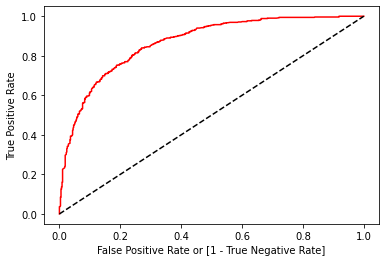

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, gb_classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_train_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## Test Data

In [33]:
y_pred_test=gb_classifier.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [34]:
print('Accuracy Score:',accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.6863636363636364


In [35]:
print('Classification Report:\n',classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       114
           1       0.67      0.69      0.68       106

    accuracy                           0.69       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.69      0.69      0.69       220



In [36]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[78 36]
 [33 73]]


0.6864448857994042


Text(0, 0.5, 'True Positive Rate')

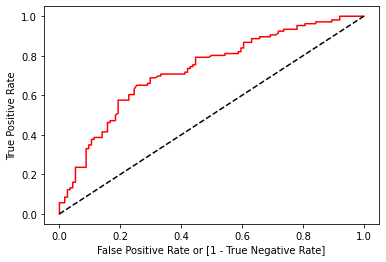

In [37]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, gb_classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Stacking Technique

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

logistic_model=LogisticRegression()
dt_model=DecisionTreeClassifier()
svm_model=SVC()

voting_classifier=VotingClassifier(estimators=[('log_model', logistic_model),
                                               ('decision_tree_model',dt_model),
                                               ('SVM_model',svm_model)])
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('log_model', LogisticRegression()),
                             ('decision_tree_model', DecisionTreeClassifier()),
                             ('SVM_model', SVC())])

In [39]:
y_pred=voting_classifier.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.6636363636363637

### THE END !!!

## Model Buidling: Validation Techniques

In [41]:
X=claimants_data.drop(labels='ATTORNEY', axis=1)
y=claimants_data[['ATTORNEY']]

In [42]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()

### K-Fold Cross Validation

In [43]:
from sklearn.model_selection import KFold, cross_val_score

n_fold=KFold(n_splits=5, shuffle=True, random_state=12)

cv_scores=cross_val_score(estimator=log_model, X=X, y=y, cv=n_fold)
print('CV Score:',cv_scores)
print('Mean Accuracy:', cv_scores.mean())
print('Std Deviation:', cv_scores.std())

CV Score: [0.68636364 0.72146119 0.71232877 0.74429224 0.66210046]
Mean Accuracy: 0.7053092569530925
Std Deviation: 0.028480758795126154


### LOOCV

In [44]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

loocv=LeaveOneOut()

cv_scores=cross_val_score(estimator=log_model, X=X, y=y, cv=loocv)
print('CV Score:',cv_scores)
print('Mean Accuracy:', cv_scores.mean())
print('Std Deviation:', cv_scores.std())

CV Score: [1. 1. 1. ... 1. 1. 1.]
Mean Accuracy: 0.7025547445255474
Std Deviation: 0.4571340891578643


### THE END!!!!!